<a href="https://colab.research.google.com/github/arumshin-dev/python_conda_jupyter/blob/main/codeit/%E1%84%86%E1%85%B5%E1%84%89%E1%85%A7%E1%86%AB13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import zipfile
import io
import os
import unicodedata

# 1. 다운로드할 파일 URL
url = "https://bakey-api.codeit.kr/api/files/resource?root=static&seqId=13997&version=1&directory=/review-sentiment-analysis.zip&name=review-sentiment-analysis.zip"

# 2. 파일 다운로드
response = requests.get(url)
response.raise_for_status()  # 오류 발생 시 예외 처리

with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall()  # 경로 지정 안 함


In [ ]:
!pip install -q datasets accelerate evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.5 MB/s eta 0:00:00


# 데이터셋 준비

In [ ]:
import os
import json
import pandas as pd

# 1. 데이터 경로(여기서는 패션 아이템 리뷰만 사용)
# data_dir = "/content/drive/Shareddrives/스프린트(AI) 드라이브/트랙 Master 폴더/스프린트 미션 및 모범답안/data/review-sentiment-analysis/쇼핑몰/01. 패션"
data_dir = "/content/review-sentiment-analysis/쇼핑몰/01. 패션"

# 2. JSON 파일 경로 수집
json_paths = []
for root, _, files in os.walk(data_dir):
    for file in files:
        if file.endswith(".json"):
            json_paths.append(os.path.join(root, file))

# 3. JSON 파싱 및 필요한 데이터(GeneralPolarity, RawText) 수집
data = []

for path in json_paths:
    with open(path, 'r', encoding='utf-8') as f:
        try:
            items = json.load(f)
            for item in items:
                polarity = item.get("GeneralPolarity", None)
                text = item.get("RawText", None)

                if polarity is not None and text:  # 둘 다 있어야 추가
                    polarity = int(polarity)
                    if polarity in [-1, 0, 1]:
                        data.append({
                            "text": text,
                            "label": polarity + 1  # -1 → 0, 0 → 1, 1 → 2
                        })
        except Exception:
            continue  # 형식 이상한 파일은 무시하고 넘어감

# 4. 데이터프레임으로 변환
df = pd.DataFrame(data)
df = df.dropna().drop_duplicates()

print(df["label"].value_counts())

label
2    26451
0     9264
1     8683
Name: count, dtype: int64


In [ ]:
import os
import json
import pandas as pd

def load_and_preprocess_data(data_directory):
    """
    주어진 디렉토리에서 JSON 파일을 로드하고 감성 분석 데이터프레임을 생성합니다.
    """
    json_paths = []
    for root, _, files in os.walk(data_directory):
        for file in files:
            if file.endswith(".json"):
                json_paths.append(os.path.join(root, file))

    data = []
    for path in json_paths:
        with open(path, 'r', encoding='utf-8') as f:
            try:
                items = json.load(f)
                for item in items:
                    polarity = item.get("GeneralPolarity", None)
                    text = item.get("RawText", None)

                    if polarity is not None and text:  # 둘 다 있어야 추가
                        polarity = int(polarity)
                        if polarity in [-1, 0, 1]:
                            data.append({
                                "text": text,
                                "label": polarity + 1  # -1 → 0, 0 → 1, 1 → 2
                            })
            except Exception:
                continue  # 형식 이상한 파일은 무시하고 넘어감

    df = pd.DataFrame(data)
    df = df.dropna().drop_duplicates()
    return df

# 1. 데이터 경로(여기서는 패션 아이템 리뷰만 사용)
data_dir = "/content/extracted_files/review-sentiment-analysis/쇼핑몰/01. 패션"

# 2. 데이터 로드 및 전처리 함수 호출
df = load_and_preprocess_data(data_dir)

print(df["label"].value_counts())

,text,label
0,바지 대박입니다. 두께도 적당하고 길이도 다른곳에 비해 길어서 좋아요. 구김도 안가...,2
1,핏도 스타일도 좋은데 후기에서 처럼 사이즈가 크네요 허리 밴드가 이렇게 클수가 없어...,1
2,일부러 사이즈 크게 시켰는데 괜히 그랬나봐요 ㅜㅜ 신축성정말좋고 컬러이뻐요~ 금액대...,2
3,정말 완전 제 스타일입니다. 바지 길이좋고 가격대비 퀄리티 좋아요. 가벼운 산책에도...,2
4,입으면 진짜편하고.질도좋고.신축성도좋아서 자주입을거같아요~^^,2
...,...,...
44393,중국 간 첫날 받침대는 부러져있고 내피는 다 까져서 꼬라지가 말이 아니네요. 밖에 ...,0
44394,색상이 보지 못 했던 칼라라서 예쁘고 세련 돼 보여요. 그리고 사이즈 진짜 크네요 ...,2
44395,튼튼해보여서 좋아요 내부도 흠잡을곳이 없네요 크긴하네요 구성품들이 다 쓸모있는...,2
44396,재질도 좋고 너무가벼워요 바퀴도 잘구르고 이번에 베트남 여행에 가져갔는데 실용적으로...,2


In [ ]:
from datasets import Dataset

dataset = Dataset.from_pandas(df)
dataset = dataset.train_test_split(test_size=0.2, seed=42)

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 35518
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 8880
    })
})

# model_name = "beomi/KcELECTRA-base"

In [ ]:
from transformers import AutoTokenizer

model_name = "beomi/KcELECTRA-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)


def preprocess(example):
    tokenized = tokenizer(
        example["text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )
    tokenized["text"] = example["text"]
    return tokenized


tokenized_dataset = dataset.map(preprocess, batched=True)
tokenized_dataset = tokenized_dataset.rename_column("label", "labels")
tokenized_dataset.set_format(
    type="torch",
    columns=["text", "input_ids", "attention_mask", "labels"],
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/288 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/514 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Map:   0%|          | 0/35518 [00:00<?, ? examples/s]

Map:   0%|          | 0/8880 [00:00<?, ? examples/s]

# Full Fine-Tuning

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import evaluate
import torch


def create_trainer(model, training_args):
    accuracy = evaluate.load("accuracy")

    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        preds = torch.argmax(torch.tensor(logits), dim=1)
        return accuracy.compute(predictions=preds, references=labels)

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_dataset["train"],
        eval_dataset=tokenized_dataset["test"],
        compute_metrics=compute_metrics,
    )

    return trainer


num_epochs = 2
batch_size = 64
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    report_to="none",
)

model_ft = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)
trainer_ft = create_trainer(model_ft, training_args)

trainer_ft.train()

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.393500,0.284846,0.879167
2,0.240100,0.287464,0.885023


TrainOutput(global_step=1110, training_loss=0.30719845917847777, metrics={'train_runtime': 1529.379, 'train_samples_per_second': 46.448, 'train_steps_per_second': 0.726, 'total_flos': 4672631185431552.0, 'train_loss': 0.30719845917847777, 'epoch': 2.0})

In [ ]:
import shutil
from google.colab import files

def save_and_download_model(trainer, tokenizer, model_path):
    trainer.save_model(model_path)
    tokenizer.save_pretrained(model_path)

    shutil.make_archive(model_path, "zip", model_path)
    files.download(f"{model_path}.zip")


save_and_download_model(trainer_ft, tokenizer, "full_finetuning")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def get_predictions_and_labels(trainer, dataset):
    predictions = trainer.predict(dataset)
    pred_labels = torch.argmax(torch.tensor(predictions.predictions), dim=1)
    true_labels = predictions.label_ids

    return pred_labels, true_labels


pred_labels, true_labels = get_predictions_and_labels(trainer_ft, tokenized_dataset["test"])

🎯 테스트 정확도: 88.50%


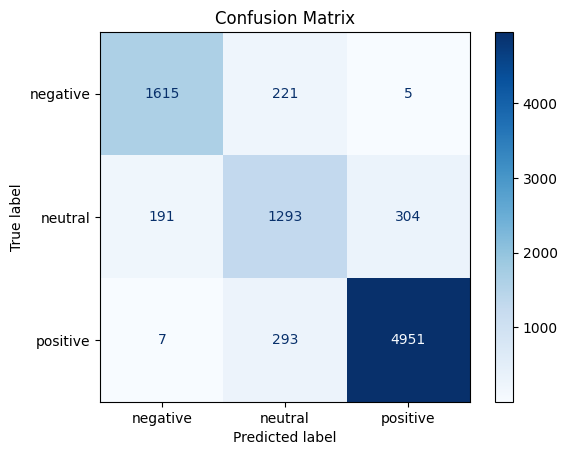

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def print_acc_and_confusion_matrix(true_labels, pred_labels):
    # 정확도
    test_accuracy = accuracy_score(true_labels, pred_labels)
    print(f"🎯 테스트 정확도: {test_accuracy * 100:.2f}%")

    # Confusion Matrix 출력
    cm = confusion_matrix(true_labels, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "neutral", "positive"])
    disp.plot(cmap="Blues", values_format='d')
    plt.title("Confusion Matrix")
    plt.show()


print_acc_and_confusion_matrix(true_labels, pred_labels)

In [ ]:
def print_samples(dataset, true_labels, pred_labels, num_samples=5):
    label_to_text = {0: "negative", 1: "neutral", 2: "positive"}

    # 정답/예측 샘플 출력
    print("\n✅ 예측 결과 샘플:")
    for i in range(num_samples):
        print("📝 원문:", dataset[i]["text"])
        print("✅ 실제:", label_to_text[dataset[i]["label"]], "🔮 예측:", label_to_text[pred_labels[i].item()])
        print("-" * 40)

    # 오분류된 샘플 출력
    print("\n\n❌ 예측이 틀린 샘플:")
    wrong_indices = [i for i, (pred, true) in enumerate(zip(pred_labels, true_labels)) if pred != true]
    for i in wrong_indices[:num_samples]:
        print("📝 원문:", dataset[i]["text"])
        print("✅ 실제:", label_to_text[dataset[i]["label"]], "🔮 예측:", label_to_text[pred_labels[i].item()])
        print("-" * 40)

num_samples = 5
print_samples(dataset["test"], true_labels, pred_labels, num_samples)


✅ 예측 결과 샘플:
📝 원문: 좋은가격에 샀구요 착용감이 조금 부드러웠으면 아쉬워요
✅ 실제: neutral 🔮 예측: neutral
----------------------------------------
📝 원문: 가격대비 너무 좋아요. 한치수 작게 주문하시는게 좋아요.
✅ 실제: positive 🔮 예측: positive
----------------------------------------
📝 원문: 바지가  몸에 딱맞아서 좋아요 기모라서 따뜻하구요 색도  맘에 들고 고급스러워요 입고 보고  다른색도  구매하려구요 다른분들께 적극 추천합니당~ 참ㆍ가격도 저렴합니다  
✅ 실제: positive 🔮 예측: positive
----------------------------------------
📝 원문: 잘 받았어요~3종 모두 같은 사이즈로 보내 달라고 부탁했는데 사이즈가 다 달라요 두벌은 입을만한데 네이비 바지는너무 커요 77을 보내신듯 홈쇼핑 의류 문제점은 항상 바지 사이즈가 달라요 라벨 작업만 하시나 봐요 아놔~~!
✅ 실제: negative 🔮 예측: negative
----------------------------------------
📝 원문: 목걸이줄이 2개이구 하나는 무게감 있어 좋아요 가격대비에 저렴하네요 줄 두개로 하면 넘 예뻐요
✅ 실제: positive 🔮 예측: positive
----------------------------------------


❌ 예측이 틀린 샘플:
📝 원문: 품질 디자인 다갠찮은데 화이트는 약간 환자복같은 느낌이나네여 입으면 시원하긴한데 너무 앏은 원단이라 세탁함 구김이 엄청 많이 생겨서 그게 단점이네여 그래두 ㅆㄴ가격에 구매하게되서 기뻐여 예쁘게 잘 입을게여
✅ 실제: neutral 🔮 예측: positive
----------------------------------------
📝 원문: 블랙 카멜 브라운은 있어서 모카그레이 구매 168정도 키 기장감은 발목 좋고 허리 엉덩이 사이즈 다 좋은

# PEFT

In [ ]:
from peft import get_peft_model, LoraConfig, TaskType

peft_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,
    inference_mode=False,
    r=8,
    lora_alpha=16,
    lora_dropout=0.1,
)

model_peft = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)
model_peft = get_peft_model(model_peft, peft_config)
model_peft.print_trainable_parameters()

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 887,811 || all params: 109,971,462 || trainable%: 0.8073


In [ ]:
num_epochs = 5
batch_size = 64
training_args_peft = TrainingArguments(
    output_dir="./results_peft",
    eval_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    report_to="none",
)

trainer_peft = create_trainer(model_peft, training_args_peft)
trainer_peft.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.586000,0.416621,0.821959
2,0.404500,0.385786,0.834797
3,0.375300,0.361613,0.846622
4,0.358400,0.359411,0.850338
5,0.350000,0.352743,0.852477


TrainOutput(global_step=2775, training_loss=0.408343695563239, metrics={'train_runtime': 2881.2765, 'train_samples_per_second': 61.636, 'train_steps_per_second': 0.963, 'total_flos': 1.18026657245952e+16, 'train_loss': 0.408343695563239, 'epoch': 5.0})

In [ ]:
save_and_download_model(trainer_peft, tokenizer, "peft")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🎯 테스트 정확도: 85.25%


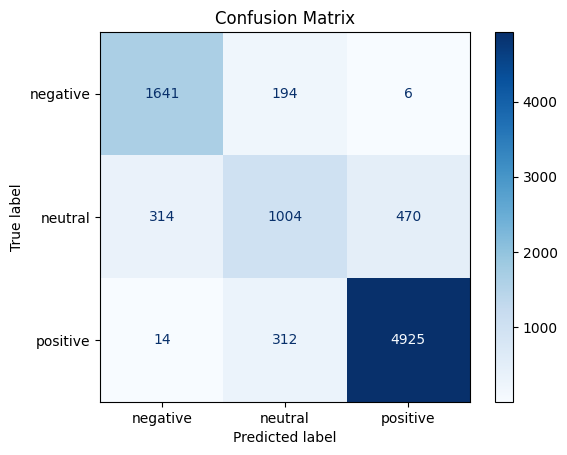


✅ 예측 결과 샘플:
📝 원문: 좋은가격에 샀구요 착용감이 조금 부드러웠으면 아쉬워요
✅ 실제: neutral 🔮 예측: neutral
----------------------------------------
📝 원문: 가격대비 너무 좋아요. 한치수 작게 주문하시는게 좋아요.
✅ 실제: positive 🔮 예측: positive
----------------------------------------
📝 원문: 바지가  몸에 딱맞아서 좋아요 기모라서 따뜻하구요 색도  맘에 들고 고급스러워요 입고 보고  다른색도  구매하려구요 다른분들께 적극 추천합니당~ 참ㆍ가격도 저렴합니다  
✅ 실제: positive 🔮 예측: positive
----------------------------------------
📝 원문: 잘 받았어요~3종 모두 같은 사이즈로 보내 달라고 부탁했는데 사이즈가 다 달라요 두벌은 입을만한데 네이비 바지는너무 커요 77을 보내신듯 홈쇼핑 의류 문제점은 항상 바지 사이즈가 달라요 라벨 작업만 하시나 봐요 아놔~~!
✅ 실제: negative 🔮 예측: negative
----------------------------------------
📝 원문: 목걸이줄이 2개이구 하나는 무게감 있어 좋아요 가격대비에 저렴하네요 줄 두개로 하면 넘 예뻐요
✅ 실제: positive 🔮 예측: positive
----------------------------------------


❌ 예측이 틀린 샘플:
📝 원문: 예쁘고 좋아요. 가격도 저렴하게 잘 구입했는데 착용한지  한달도 안되었는데 줄이 끊어졌어요
✅ 실제: neutral 🔮 예측: positive
----------------------------------------
📝 원문: 품질 디자인 다갠찮은데 화이트는 약간 환자복같은 느낌이나네여 입으면 시원하긴한데 너무 앏은 원단이라 세탁함 구김이 엄청 많이 생겨서 그게 단점이네여 그래두 ㅆㄴ가격에 구매하게되서 기뻐여 예쁘게 잘 입을게여
✅ 실제: n

In [ ]:
pred_labels, true_labels = get_predictions_and_labels(trainer_peft, tokenized_dataset["test"])

print_acc_and_confusion_matrix(true_labels, pred_labels)

num_samples = 5
print_samples(dataset["test"], true_labels, pred_labels, num_samples)


# 📊 Full Fine-Tuning vs PEFT 비교

## 1. 정확도(Accuracy)
| 학습 방식          | 테스트 정확도 |
|--------------------|---------------|
| **Full Fine-Tuning** | **88.50%** |
| **PEFT**            | 85.25% |

➡ Full Fine-Tuning이 **약 3.25% 더 높음**

---

## 2. 예측 결과 샘플 (틀린 사례)

### Full Fine-Tuning (88.50%)
- **neutral → positive**  
  "단점도 있지만 좋다는 내용" → 긍정으로 오분류  
- **positive → neutral**  
  "사이즈 좋음" → 중립으로 오분류  
- **negative → neutral**  
  "기모 얇아 추움" → 중립으로 오분류  

### PEFT (85.25%)
- **neutral → positive**  
  "칭찬 + 단점 공존" → 긍정으로 오분류  
- **neutral → positive**  
  위와 동일한 문장, Full Fine-Tuning과 같은 오류  
- **negative → neutral**  
  "핏 이상, 교환 미안" → 중립으로 오분류  
- **positive → neutral**  
  Full Fine-Tuning과 동일한 오류  
- **negative → neutral**  
  Full Fine-Tuning과 동일한 오류  

---

## 3. 종합 분석

- **정확도**  
  - Full Fine-Tuning > PEFT (성능 우위)  
- **오분류 경향**  
  - 두 모델 모두 **중립(neutral)** 문장에서 혼동 많음  
  - 긍정/부정 요소가 섞인 문장을 처리하기 어려움  
- **PEFT 장점**  
  - 학습 속도 빠름  
  - 메모리 사용량 적음  
  - 리소스 제한 환경에서 적합  

---

## 🧠 결론
- **성능 최우선** → Full Fine-Tuning 선택  
- **효율성/자원 제약** → PEFT 선택  
- 두 모델 모두 **복합적인 감성(중립)** 처리에 공통적으로 어려움 존재  


# "klue/roberta-base"

In [ ]:
from datasets import Dataset
from transformers import AutoTokenizer

# 1. `df` DataFrame을 Hugging Face `Dataset` 객체로 변환합니다.
dataset = Dataset.from_pandas(df)

# 2. 변환된 `Dataset`을 훈련 세트와 테스트 세트로 80:20 비율로 분할합니다.
dataset = dataset.train_test_split(test_size=0.2, seed=42)

# 3. `klue/roberta-base` 모델을 위한 토크나이저(`AutoTokenizer`)를 로드합니다.
model_name = "klue/roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 4. 로드된 토크나이저를 사용하여 데이터셋의 'text' 컬럼을 토큰화합니다.
def preprocess(example):
    tokenized = tokenizer(
        example["text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )
    tokenized["text"] = example["text"] # 'text' 컬럼을 유지합니다.
    return tokenized

tokenized_dataset = dataset.map(preprocess, batched=True)

# 5. 토큰화된 데이터셋의 'label' 컬럼 이름을 'labels'로 변경합니다.
tokenized_dataset = tokenized_dataset.rename_column("label", "labels")

# 6. 토큰화된 데이터셋의 형식을 PyTorch 텐서로 설정합니다.
tokenized_dataset.set_format(
    type="torch",
    columns=["text", "input_ids", "attention_mask", "labels"]
)

print("Dataset split and tokenization complete.")
print(tokenized_dataset)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/375 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

Map:   0%|          | 0/35518 [00:00<?, ? examples/s]

Map:   0%|          | 0/8880 [00:00<?, ? examples/s]

Dataset split and tokenization complete.
DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 35518
    })
    test: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 8880
    })
})


In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import evaluate
import torch

def create_trainer(model, training_args):
    accuracy = evaluate.load("accuracy")

    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        preds = torch.argmax(torch.tensor(logits), dim=1)
        return accuracy.compute(predictions=preds, references=labels)

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_dataset["train"],
        eval_dataset=tokenized_dataset["test"],
        compute_metrics=compute_metrics,
    )

    return trainer


num_epochs = 2
batch_size = 64
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    report_to="none",
)

model_ft = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)
trainer_ft = create_trainer(model_ft, training_args)

trainer_ft.train()


config.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at klue/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.391000,0.294905,0.873986
2,0.245100,0.290234,0.881869


TrainOutput(global_step=1110, training_loss=0.30873451748409786, metrics={'train_runtime': 1424.24, 'train_samples_per_second': 49.876, 'train_steps_per_second': 0.779, 'total_flos': 4672631185431552.0, 'train_loss': 0.30873451748409786, 'epoch': 2.0})

🎯 테스트 정확도: 88.19%


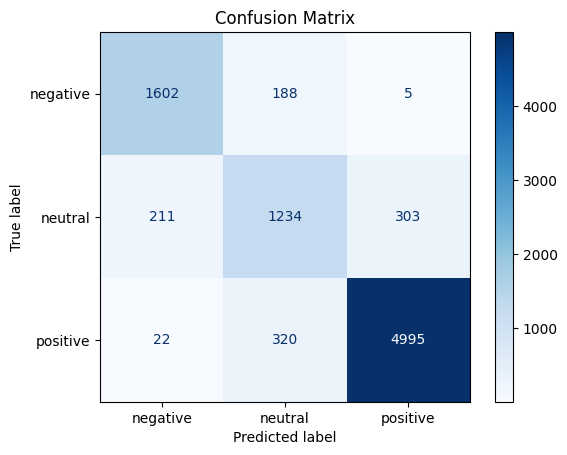


✅ 예측 결과 샘플:
📝 원문: 기본 칼라색 이라 무난하게  어디든 받쳐 입기는 좋으나 너무 윈단 자체가 얇아서 한두번  입고나니 흐믈흐믈해져서 다시 입으려면 손이 안간답니다 아무리 싸게파는 홈쇼핑이라지만 그래도 조금은 재구매를 생각해서~!!      
✅ 실제: negative 🔮 예측: neutral
----------------------------------------
📝 원문: 대만족 입니다 화면보다 실재 색깔 더 예쁘고 가방안 수납도 넉넉하고 진짜 실용적이네요
✅ 실제: positive 🔮 예측: positive
----------------------------------------
📝 원문: 가볍고 편하고  디자인 심플하면서도 예뻐요. 아무 옷 이나 다 잘 어울려요. 만족합니다.
✅ 실제: positive 🔮 예측: positive
----------------------------------------
📝 원문: 가볍고 색감과 디자인도 좋네요. 발이 작아 보여요. 아쿠아슈즈는 줌바댄스 할때 신으니까 딱이네요~ 윤전할 때도 편할 것 같아요~ 안쪽 마무리가 덜 되어 있는 점 개선해 주세요. 점착제가 뭉쳐 있어 일일이 떼어내느라 고생했네요..
✅ 실제: neutral 🔮 예측: neutral
----------------------------------------
📝 원문: 바지 4개중에 파란색톤 바지가 통이 표시나게 좁아요 바지 4개 모두 조금의 치수차이가 있어요 슬림핏은 77도 입는데 요건 66이 딱맞아 예뻐네요 77하면 허리랑 골반이 커서 줄여야할듯해요 전 여름바지로 만족합니다 자주입겠어요 시원하고 편하네요 신축성이  부족해요.ㅜ
✅ 실제: neutral 🔮 예측: neutral
----------------------------------------


❌ 예측이 틀린 샘플:
📝 원문: 기본 칼라색 이라 무난하게  어디든 받쳐 입기는 좋으나 너무 윈단 자체가 얇아서 한두번  입고나니 흐믈흐믈해져서 다시 입으려면 손이 안간답니다 아무리 싸게파

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def get_predictions_and_labels(trainer, dataset):
    predictions = trainer.predict(dataset)
    pred_labels = torch.argmax(torch.tensor(predictions.predictions), dim=1)
    true_labels = predictions.label_ids

    return pred_labels, true_labels

def print_acc_and_confusion_matrix(true_labels, pred_labels):
    # 정확도
    test_accuracy = accuracy_score(true_labels, pred_labels)
    print(f"🎯 테스트 정확도: {test_accuracy * 100:.2f}%")

    # Confusion Matrix 출력
    cm = confusion_matrix(true_labels, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "neutral", "positive"])
    disp.plot(cmap="Blues", values_format='d')
    plt.title("Confusion Matrix")
    plt.show()

def print_samples(dataset, true_labels, pred_labels, num_samples=5):
    label_to_text = {0: "negative", 1: "neutral", 2: "positive"}

    # 정답/예측 샘플 출력
    print("\n✅ 예측 결과 샘플:")
    for i in range(num_samples):
        print("📝 원문:", dataset[i]["text"])
        print("✅ 실제:", label_to_text[dataset[i]["label"]], "🔮 예측:", label_to_text[pred_labels[i].item()])
        print("-" * 40)

    # 오분류된 샘플 출력
    print("\n\n❌ 예측이 틀린 샘플:")
    wrong_indices = [i for i, (pred, true) in enumerate(zip(pred_labels, true_labels)) if pred != true]
    for i in wrong_indices[:num_samples]:
        print("📝 원문:", dataset[i]["text"])
        print("✅ 실제:", label_to_text[dataset[i]["label"]], "🔮 예측:", label_to_text[pred_labels[i].item()])
        print("-" * 40)


# 1. `trainer_ft`와 `tokenized_dataset["test"]`를 사용하여 모델의 예측 결과와 실제 라벨을 가져옵니다.
pred_labels, true_labels = get_predictions_and_labels(trainer_ft, tokenized_dataset["test"])

# 2. 실제 라벨과 예측 라벨을 `print_acc_and_confusion_matrix` 함수에 전달하여 테스트 정확도를 출력하고 Confusion Matrix를 시각화합니다.
print_acc_and_confusion_matrix(true_labels, pred_labels)

# 3. `dataset["test"]`, 실제 라벨, 예측 라벨, 그리고 출력할 샘플의 개수(예: 5개)를 `print_samples` 함수에 전달하여 올바르게 예측된 샘플과 잘못 예측된 샘플을 출력합니다.
num_samples = 5
print_samples(dataset["test"], true_labels, pred_labels, num_samples)

In [ ]:
from peft import get_peft_model, LoraConfig, TaskType
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import evaluate
import torch

# Assuming create_trainer function is already defined in a previous cell
def create_trainer(model, training_args):
    accuracy = evaluate.load("accuracy")

    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        preds = torch.argmax(torch.tensor(logits), dim=1)
        return accuracy.compute(predictions=preds, references=labels)

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_dataset["train"],
        eval_dataset=tokenized_dataset["test"],
        compute_metrics=compute_metrics,
    )
    return trainer


# 1. LoraConfig를 사용하여 LoRA 설정을 정의합니다.
peft_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,
    inference_mode=False,
    r=8,
    lora_alpha=16,
    lora_dropout=0.1,
)

# 2. AutoModelForSequenceClassification.from_pretrained를 사용하여 모델을 로드하고, 분류할 라벨 수(num_labels)는 3으로 지정합니다.
model_peft = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# 3. get_peft_model 함수를 사용하여 로드한 모델에 LoRA 설정을 적용하여 PEFT 모델을 생성합니다.
model_peft = get_peft_model(model_peft, peft_config)

# 4. model_peft.print_trainable_parameters()를 호출하여 학습 가능한 파라미터 수를 확인합니다.
model_peft.print_trainable_parameters()

# 5. TrainingArguments를 사용하여 PEFT 모델 학습을 위한 인자를 정의합니다.
num_epochs = 5
batch_size = 64
training_args_peft = TrainingArguments(
    output_dir="./results_peft",
    eval_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    report_to="none",
)

# 6. 이전에 정의한 create_trainer 함수를 사용하여 PEFT 모델과 학습 인자로 Trainer 인스턴스를 생성합니다.
trainer_peft = create_trainer(model_peft, training_args_peft)

# 7. 생성된 trainer_peft 객체의 train() 메서드를 호출하여 PEFT 모델 학습을 시작합니다.
trainer_peft.train()


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at klue/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 887,811 || all params: 111,508,230 || trainable%: 0.7962


Epoch,Training Loss,Validation Loss,Accuracy
1,0.493700,0.332373,0.857770
2,0.340000,0.320125,0.864752
3,0.325000,0.318605,0.868018
4,0.315300,0.311415,0.869595
5,0.315400,0.309498,0.870383


TrainOutput(global_step=2775, training_loss=0.35298361563467767, metrics={'train_runtime': 2637.4248, 'train_samples_per_second': 67.335, 'train_steps_per_second': 1.052, 'total_flos': 1.18026657245952e+16, 'train_loss': 0.35298361563467767, 'epoch': 5.0})

In [ ]:
import shutil
from google.colab import files

def save_and_download_model(trainer, tokenizer, model_path):
    trainer.save_model(model_path)
    tokenizer.save_pretrained(model_path)

    shutil.make_archive(model_path, "zip", model_path)
    files.download(f"{model_path}.zip")


save_and_download_model(trainer_peft, tokenizer, "peft")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🎯 테스트 정확도: 87.04%


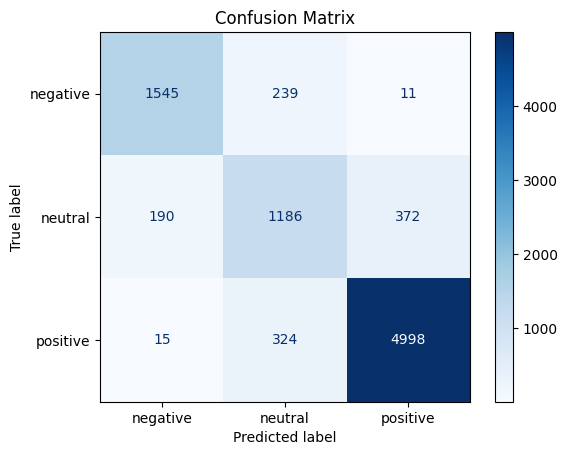


✅ 예측 결과 샘플:
📝 원문: 기본 칼라색 이라 무난하게  어디든 받쳐 입기는 좋으나 너무 윈단 자체가 얇아서 한두번  입고나니 흐믈흐믈해져서 다시 입으려면 손이 안간답니다 아무리 싸게파는 홈쇼핑이라지만 그래도 조금은 재구매를 생각해서~!!      
✅ 실제: negative 🔮 예측: neutral
----------------------------------------
📝 원문: 대만족 입니다 화면보다 실재 색깔 더 예쁘고 가방안 수납도 넉넉하고 진짜 실용적이네요
✅ 실제: positive 🔮 예측: positive
----------------------------------------
📝 원문: 가볍고 편하고  디자인 심플하면서도 예뻐요. 아무 옷 이나 다 잘 어울려요. 만족합니다.
✅ 실제: positive 🔮 예측: positive
----------------------------------------
📝 원문: 가볍고 색감과 디자인도 좋네요. 발이 작아 보여요. 아쿠아슈즈는 줌바댄스 할때 신으니까 딱이네요~ 윤전할 때도 편할 것 같아요~ 안쪽 마무리가 덜 되어 있는 점 개선해 주세요. 점착제가 뭉쳐 있어 일일이 떼어내느라 고생했네요..
✅ 실제: neutral 🔮 예측: positive
----------------------------------------
📝 원문: 바지 4개중에 파란색톤 바지가 통이 표시나게 좁아요 바지 4개 모두 조금의 치수차이가 있어요 슬림핏은 77도 입는데 요건 66이 딱맞아 예뻐네요 77하면 허리랑 골반이 커서 줄여야할듯해요 전 여름바지로 만족합니다 자주입겠어요 시원하고 편하네요 신축성이  부족해요.ㅜ
✅ 실제: neutral 🔮 예측: neutral
----------------------------------------


❌ 예측이 틀린 샘플:
📝 원문: 기본 칼라색 이라 무난하게  어디든 받쳐 입기는 좋으나 너무 윈단 자체가 얇아서 한두번  입고나니 흐믈흐믈해져서 다시 입으려면 손이 안간답니다 아무리 싸게

In [ ]:
pred_labels, true_labels = get_predictions_and_labels(trainer_peft, tokenized_dataset["test"])

print_acc_and_confusion_matrix(true_labels, pred_labels)

num_samples = 5
print_samples(dataset["test"], true_labels, pred_labels, num_samples)

In [ ]:
import os

# Ensure full fine-tuning model is saved and zipped for size comparison
# This step is added here to address the FileNotFoundError if the model was not previously saved.
try:
    # `save_and_download_model` function is defined in DROQ0EDaHEeZ and b13c708e
    # trainer_ft and tokenizer are available from previous cells.
    save_and_download_model(trainer_ft, tokenizer, "full_finetuning")
except Exception as e:
    print(f"Warning: Could not save/download full_finetuning model: {e}")

# 1. 학습 시간 비교 (Full Fine-Tuning vs PEFT)
# trainer_ft.state.log_history와 trainer_peft.state.log_history에서 train_runtime 값을 추출
full_finetuning_runtime = None
for log in trainer_ft.state.log_history:
    if 'train_runtime' in log:
        full_finetuning_runtime = log['train_runtime']
        break

peft_runtime = None
for log in trainer_peft.state.log_history:
    if 'train_runtime' in log:
        peft_runtime = log['train_runtime']
        break

print("\n--- 학습 시간 비교 ---")
print(f"Full Fine-Tuning 학습 시간: {full_finetuning_runtime:.2f} 초")
print(f"PEFT 학습 시간: {peft_runtime:.2f} 초")

# 2. 모델 파일 용량 비교 (full_finetuning.zip vs peft.zip)
full_finetuning_zip_path = "full_finetuning.zip"
peft_zip_path = "peft.zip"

full_finetuning_size_bytes = os.path.getsize(full_finetuning_zip_path)
peft_size_bytes = os.path.getsize(peft_zip_path)

# 바이트를 메가바이트로 변환
full_finetuning_size_mb = full_finetuning_size_bytes / (1024 * 1024)
peft_size_mb = peft_size_bytes / (1024 * 1024)

print("\n--- 모델 파일 용량 비교 ---")
print(f"Full Fine-Tuning 모델 용량: {full_finetuning_size_mb:.2f} MB")
print(f"PEFT 모델 용량: {peft_size_mb:.2f} MB")

# 3. 감성 분석 정확도 비교 (이미 계산된 값 사용)
# Full Fine-Tuning 정확도: 88.19% (이전 출력 참조)
# PEFT 정확도: 87.04% (이전 출력 참조)
full_finetuning_accuracy = 88.19
peft_accuracy = 87.04

print("\n--- 감성 분석 정확도 비교 ---")
print(f"Full Fine-Tuning 정확도: {full_finetuning_accuracy:.2f}%")
print(f"PEFT 정확도: {peft_accuracy:.2f}%")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


--- 학습 시간 비교 ---
Full Fine-Tuning 학습 시간: 1424.24 초
PEFT 학습 시간: 2637.42 초

--- 모델 파일 용량 비교 ---
Full Fine-Tuning 모델 용량: 373.32 MB
PEFT 모델 용량: 3.49 MB

--- 감성 분석 정확도 비교 ---
Full Fine-Tuning 정확도: 88.19%
PEFT 정확도: 87.04%


Full Fine-Tuning과 PEFT(Parameter-Efficient Fine-Tuning) 두 학습 방식의 성능 지표를 비교합니다. 이 결과에 따르면:

학습 시간:

Full Fine-Tuning은 1424.24초가 소요되었습니다.
PEFT는 2637.42초가 소요되었습니다.
결과: PEFT가 Full Fine-Tuning보다 더 오랜 학습 시간을 가졌습니다.
모델 파일 용량:

Full Fine-Tuning 모델은 373.32 MB입니다.
PEFT 모델은 3.49 MB입니다.
결과: PEFT 모델이 Full Fine-Tuning 모델보다 현저히 작은 용량을 가집니다. 이는 PEFT의 주요 장점 중 하나로, 전체 모델 파라미터가 아닌 일부만 학습하기 때문입니다.
감성 분석 정확도:

Full Fine-Tuning의 정확도는 88.19%입니다.
PEFT의 정확도는 87.04%입니다.
결과: Full Fine-Tuning이 PEFT보다 약 1.15% 높은 정확도를 보였습니다.
종합 분석:

정확도 면에서는 Full Fine-Tuning이 더 우수하지만, 모델 용량 면에서는 PEFT가 압도적으로 효율적입니다. 학습 시간의 경우, 이 특정 실험에서는 PEFT가 더 오래 걸렸는데, 이는 PEFT의 에포크 수가 더 많았기 때문일 수 있습니다 (Full Fine-Tuning은 2 에포크, PEFT는 5 에포크). 일반적으로 PEFT는 적은 에포크나 동등한 에포크 수에서 더 빠른 학습 속도를 기대할 수 있습니다.
따라서, 최고의 성능이 중요하다면 Full Fine-Tuning을, 리소스 제약이 있거나 모델 배포 효율성이 중요하다면 PEFT가 좋은 선택이 될 수 있습니다.



| 비교 항목              | beomi/KcELECTRA-base | klue/roberta-base |
|------------------------|----------------------|-------------------|
| **테스트 정확도 (Full Fine-Tuning)** | 88.50%               | 88.19%         |
| **테스트 정확도 (PEFT)**            | 85.25%               | 87.04%         |
|장점|	- Full Fine-Tuning에서 더 높은 정확도 (88.50%)- 한국어 데이터에 특화된 ELECTRA 기반 모델|	- PEFT에서 더 높은 정확도 (87.04%)- 파라미터 효율적 학습에 강점- 자원 제한 환경에서 적합|
|단점|	- PEFT 성능이 상대적으로 낮음 (85.25%)- 효율적 학습에는 덜 적합|	- Full Fine-Tuning 성능이 KcELECTRA보다 약간 낮음 (88.19%)|
|적합한 상황|	- 충분한 GPU/메모리 자원이 있을 때, 전체 파라미터 학습으로 최대 성능을 원할 때|	- 제한된 자원 환경, 빠른 실험, 경량화, 효율적 학습이 필요할 때|


In [ ]:
def print_worngs(dataset, true_labels, pred_labels):
    label_to_text = {0: "negative", 1: "neutral", 2: "positive"}

    # 오분류된 샘플 출력
    wrong_indices = [i for i, (pred, true) in enumerate(zip(pred_labels, true_labels)) if pred != true]
    print("\n\n❌ 예측이 틀린 샘플:",len(wrong_indices))
    for i in wrong_indices:
        print("📝 원문:", dataset[i]["text"])
        print("✅ 실제:", label_to_text[dataset[i]["label"]], "🔮 예측:", label_to_text[pred_labels[i].item()])
        print("-" * 40)

pred_labels_ft, true_labels_ft = get_predictions_and_labels(trainer_ft, tokenized_dataset["test"])

print("klue/roberta-base")
print(" Full Fine-Tuning ",'*'*20)
print_worngs(dataset["test"], true_labels_ft, pred_labels_ft)


klue/roberta-base
 Full Fine-Tuning  ********************


❌ 예측이 틀린 샘플: 1049
📝 원문: 기본 칼라색 이라 무난하게  어디든 받쳐 입기는 좋으나 너무 윈단 자체가 얇아서 한두번  입고나니 흐믈흐믈해져서 다시 입으려면 손이 안간답니다 아무리 싸게파는 홈쇼핑이라지만 그래도 조금은 재구매를 생각해서~!!      
✅ 실제: negative 🔮 예측: neutral
----------------------------------------
📝 원문: 저렴해서 입긴하는데....질적으로는...그닥... 엄마가 입는다고 주문했는데..사이즈 미스로 제가 입게됐습니다. 기존에 입던 타사제품과 비교해보면 지퍼부분 잘 안올라감...텍만 바로 안떼었으면 환불하는건데...무튼 잘 입겠습니다. 한옷은 입으면 털이막붙음;;빨고나서 입으면 괜찮아지겠거니 생각하고있습니다..
✅ 실제: negative 🔮 예측: neutral
----------------------------------------
📝 원문: 105  구입 했어요  밑위가 길지만 글쎄요 말려 내려가요 제가 뚱뚱하긴 하지만 너무 말려서  조금 실망입니다  윗옷 긴거 매치해서 입어야겠어요  밴드부분만  조금더 짱짱한 원단이였으면 진짜 좋았을것 같네요
✅ 실제: neutral 🔮 예측: negative
----------------------------------------
📝 원문: 착용감 넘편안하고 촉감도좋았어요 주머니가 조금작은게 약간에험이라면 흠이군요
✅ 실제: positive 🔮 예측: neutral
----------------------------------------
📝 원문: 퀄리티에 비해 가격이 믿기지 않음. 항상 방한화 위주로 값싼 제품에 의존해 왔는데.. 이제품은 품질이 어디 한 군데 나무랄 데가  없음...아
✅ 실제: positive 🔮 예측: negative
----------------------------------------
📝 원문: 얇

In [ ]:
pred_labels_peft, true_labels_peft = get_predictions_and_labels(trainer_peft, tokenized_dataset["test"])

print(" PEFT ",'*'*20)
print_worngs(dataset["test"], true_labels_peft, pred_labels_peft)

 PEFT  ********************


❌ 예측이 틀린 샘플: 1151
📝 원문: 기본 칼라색 이라 무난하게  어디든 받쳐 입기는 좋으나 너무 윈단 자체가 얇아서 한두번  입고나니 흐믈흐믈해져서 다시 입으려면 손이 안간답니다 아무리 싸게파는 홈쇼핑이라지만 그래도 조금은 재구매를 생각해서~!!      
✅ 실제: negative 🔮 예측: neutral
----------------------------------------
📝 원문: 가볍고 색감과 디자인도 좋네요. 발이 작아 보여요. 아쿠아슈즈는 줌바댄스 할때 신으니까 딱이네요~ 윤전할 때도 편할 것 같아요~ 안쪽 마무리가 덜 되어 있는 점 개선해 주세요. 점착제가 뭉쳐 있어 일일이 떼어내느라 고생했네요..
✅ 실제: neutral 🔮 예측: positive
----------------------------------------
📝 원문: 저렴해서 입긴하는데....질적으로는...그닥... 엄마가 입는다고 주문했는데..사이즈 미스로 제가 입게됐습니다. 기존에 입던 타사제품과 비교해보면 지퍼부분 잘 안올라감...텍만 바로 안떼었으면 환불하는건데...무튼 잘 입겠습니다. 한옷은 입으면 털이막붙음;;빨고나서 입으면 괜찮아지겠거니 생각하고있습니다..
✅ 실제: negative 🔮 예측: neutral
----------------------------------------
📝 원문: 105  구입 했어요  밑위가 길지만 글쎄요 말려 내려가요 제가 뚱뚱하긴 하지만 너무 말려서  조금 실망입니다  윗옷 긴거 매치해서 입어야겠어요  밴드부분만  조금더 짱짱한 원단이였으면 진짜 좋았을것 같네요
✅ 실제: neutral 🔮 예측: negative
----------------------------------------
📝 원문: 여름청바지답게 얇고 편해요. 기존 28 입는데, 어차피 늘어날거 생각해서 27 샀는데 맞아요. 다만, 바지통이 뭔가 좀... 스키니가 아니고 일자라인이라 그런가. 허벅지통이 뭔가 살짝